In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2022-09-30"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
stock_data["Date"] = stock_data.index

weekly_prices = stock_data.resample("W-Fri", on="Date").last()
print(weekly_prices.shape)
weekly_prices.head()


(39, 8)


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-07 00:00:00+00:00,170.719093,171.953398,168.882448,170.008133,86709100,169.840240,172.723587,177.443573
2022-01-14 00:00:00+00:00,169.188547,171.597912,168.941687,170.896835,80440800,170.027863,173.325943,172.881561
2022-01-21 00:00:00+00:00,162.355438,164.241458,160.262062,160.370682,122848900,162.444290,164.142700,167.667892
2022-01-28 00:00:00+00:00,163.629240,168.210976,160.755776,168.191223,179935700,157.220734,157.684814,157.773682
2022-02-04 00:00:00+00:00,169.740246,172.132916,168.751544,170.442230,82465400,170.728912,173.632019,172.417496


In [2]:
stock_data["Close_Lag1"] = stock_data["Close"].shift(1)
stock_data["Close_Lag2"] = stock_data["Close"].shift(2)
stock_data["Close_Lag3"] = stock_data["Close"].shift(3)


stock_data["Close_Lag1"] = stock_data["Close_Lag1"].bfill()
stock_data["Close_Lag2"] = stock_data["Close_Lag2"].bfill()
stock_data["Close_Lag3"] = stock_data["Close_Lag3"].bfill()


stock_data.head(6)


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3,Date
Date,,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564,2022-01-03 05:00:00+00:00
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564,2022-01-04 05:00:00+00:00
2022-01-05 05:00:00+00:00,177.354699,177.907665,172.447104,172.723587,94537600,177.443573,179.724564,179.724564,2022-01-05 05:00:00+00:00
2022-01-06 05:00:00+00:00,170.531448,173.098806,169.484760,169.840240,96904000,172.723587,177.443573,179.724564,2022-01-06 05:00:00+00:00
2022-01-07 05:00:00+00:00,170.719093,171.953398,168.882448,170.008133,86709100,169.840240,172.723587,177.443573,2022-01-07 05:00:00+00:00
2022-01-10 05:00:00+00:00,166.956913,170.333968,166.058336,170.027863,106765600,170.008133,169.840240,172.723587,2022-01-10 05:00:00+00:00


In [3]:
weekly_prices['Close'] = weekly_prices['Close'].astype(int)

weekly_prices['Close_Difference'] = weekly_prices['Close'].shift(-1) - weekly_prices['Close']
weekly_prices['Price_Direction'] = np.where(weekly_prices['Close_Difference'] > 0, 'Up', 'Down')
weekly_prices.drop('Close_Difference', axis=1, inplace=True)

weekly_prices.head()


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3,Price_Direction
Date,,,,,,,,,
2022-01-07 00:00:00+00:00,170.719093,171.953398,168.882448,170,86709100,169.840240,172.723587,177.443573,Down
2022-01-14 00:00:00+00:00,169.188547,171.597912,168.941687,170,80440800,170.027863,173.325943,172.881561,Down
2022-01-21 00:00:00+00:00,162.355438,164.241458,160.262062,160,122848900,162.444290,164.142700,167.667892,Up
2022-01-28 00:00:00+00:00,163.629240,168.210976,160.755776,168,179935700,157.220734,157.684814,157.773682,Up
2022-02-04 00:00:00+00:00,169.740246,172.132916,168.751544,170,82465400,170.728912,173.632019,172.417496,Down


In [4]:
weekly_prices['Close_Difference'] = weekly_prices['Close'].shift(-1) - weekly_prices['Close']

conditions = [
    (weekly_prices['Close_Difference'] > 0),
    (weekly_prices['Close_Difference'] < 0),
    (weekly_prices['Close_Difference'] == 0)
]

choices = ['Up', 'Down', 'No Change']

weekly_prices['Price_Direction'] = np.select(conditions, choices, default='No Change')

weekly_prices.drop('Close_Difference', axis=1, inplace=True)

weekly_prices["Price_Direction"].value_counts()

Price_Direction
Down         20
Up           13
No Change     6
Name: count, dtype: int64

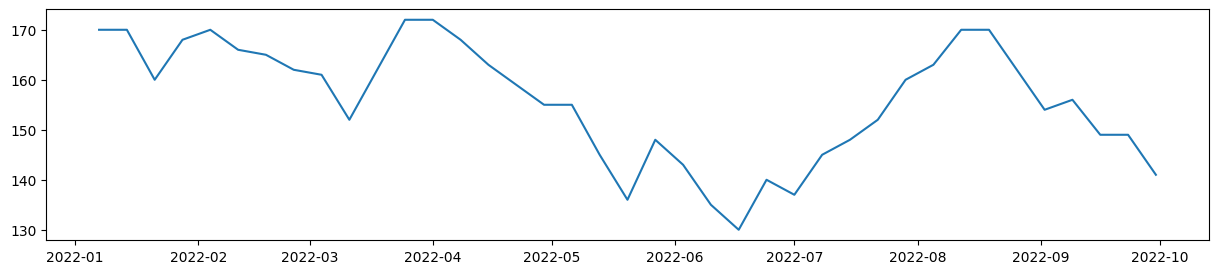

In [5]:
plt.figure(figsize=(15, 3))
plt.plot(weekly_prices.index, weekly_prices['Close'],)

In [6]:

tweets = pd.read_csv("../../data/social_media_tweets/stock_tweets.csv")
tweets = tweets[tweets["Stock Name"] == "AAPL"] 
tweets["Date"] = pd.to_datetime(tweets["Date"])

start_date = pd.to_datetime(start_date_string, utc=True)
end_date = pd.to_datetime(end_date_string, utc=True)

tweets = tweets.loc[(tweets["Date"] >= start_date) & (tweets["Date"] <= end_date)]

tweets['Date'] = pd.to_datetime(tweets['Date'], utc=True).dt.date





In [7]:
import sys
sys.path.append('../..')
from utils.SentimentAnalysis import preprocess_text



tweets["processed_tweet"] = tweets["Tweet"].apply(preprocess_text)

c:\Users\omare\.conda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from utils.SentimentAnalysis import get_vader_sentiment_score 




tweets["sentiment_score"] = tweets["processed_tweet"].apply(get_vader_sentiment_score)

tweets_aggregated = tweets.groupby("Date")["sentiment_score"].mean().reset_index()
tweets_aggregated["Date"]= pd.to_datetime(tweets_aggregated["Date"])
tweets_aggregated.set_index('Date', inplace=True)

tweets_aggregated.head()

,sentiment_score
Date,
2022-01-01,0.415550
2022-01-02,0.134000
2022-01-03,0.211930
2022-01-04,0.183754
2022-01-05,-0.027900


In [11]:
weekly_sentiment_scores = tweets_aggregated.resample('W-Fri').mean()
# weekly_sentiment_scores.reset_index(inplace=True)
weekly_sentiment_scores.head()


,sentiment_score
Date,
2022-01-07,0.172072
2022-01-14,0.224802
2022-01-21,0.179433
2022-01-28,0.112002
2022-02-04,0.204175


In [12]:
# weekly_prices["date"] = weekly_prices.index
# weekly_sentiment_scores["date"] = weekly_sentiment_scores.index

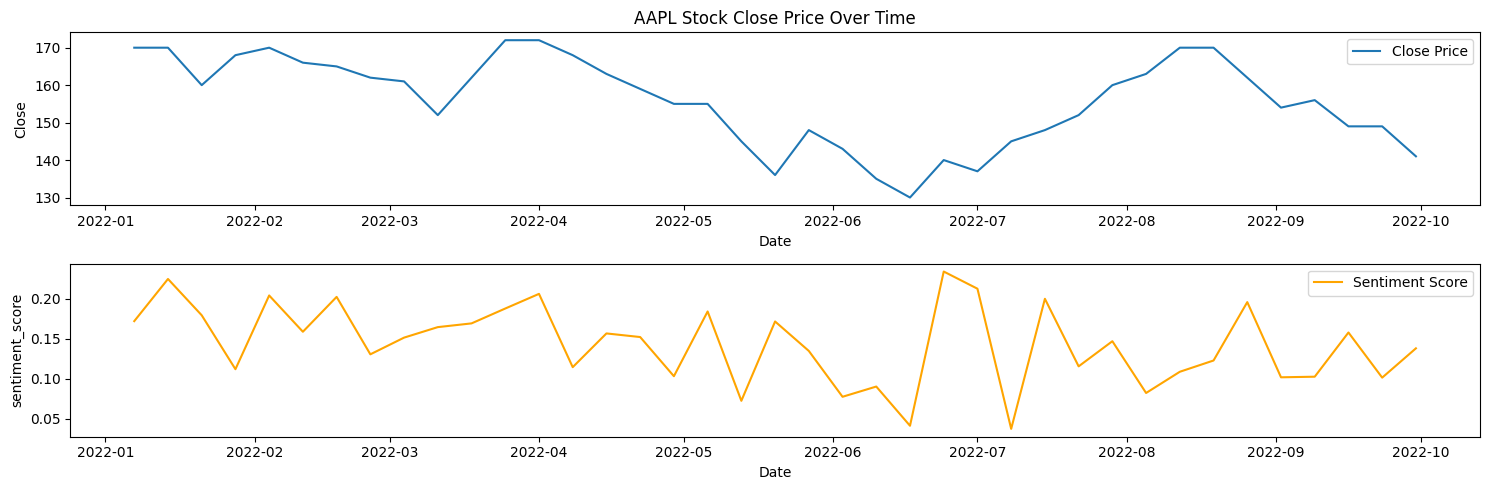

In [13]:
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.lineplot(x=weekly_prices.index, y=weekly_prices["Close"], label="Close Price")
plt.title("AAPL Stock Close Price Over Time")
plt.subplot(2, 1, 2)
sns.lineplot(x=weekly_sentiment_scores.index, y=weekly_sentiment_scores["sentiment_score"], label="Sentiment Score", color="orange")
plt.tight_layout()
plt.show()

In [14]:
close_prices = weekly_prices["Close"]
sentiment_scores = weekly_sentiment_scores["sentiment_score"]

close_prices.index = pd.to_datetime(close_prices.index).tz_localize(None) 
sentiment_scores.index = pd.to_datetime(sentiment_scores.index).tz_localize(None)  

data = pd.DataFrame({'Close Price': close_prices, 'Sentiment Score': sentiment_scores})

correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Close Price  Sentiment Score
Close Price         1.000000         0.306511
Sentiment Score     0.306511         1.000000


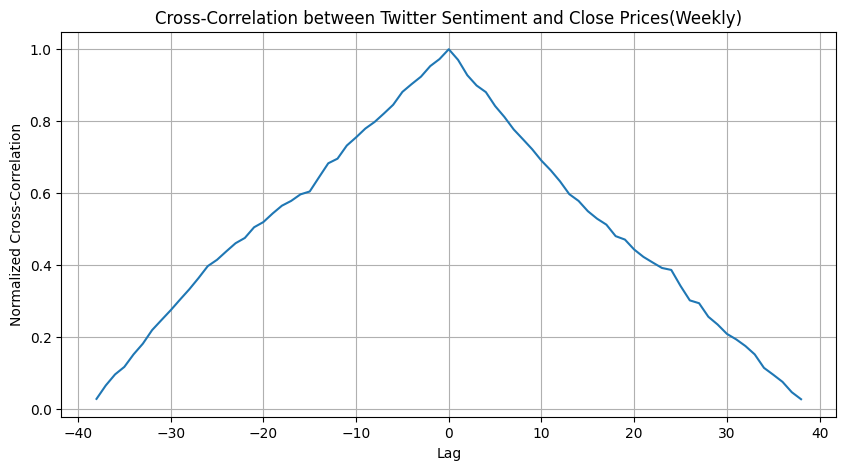

In [15]:
import numpy as np
import matplotlib.pyplot as plt

sentiment_scores = weekly_sentiment_scores['sentiment_score'].to_numpy()
close_prices = weekly_prices['Close'].to_numpy()

cross_corr = np.correlate(sentiment_scores, close_prices, mode='full')
lags = np.arange(-len(sentiment_scores) + 1, len(sentiment_scores))
# lags = [-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr / np.max(np.abs(cross_corr)))  # Normalize to [-1, 1]
plt.title('Cross-Correlation between Twitter Sentiment and Close Prices(Weekly)')
plt.xlabel('Lag')
plt.ylabel('Normalized Cross-Correlation')
plt.grid(True)
plt.show()


In [17]:
from scipy.stats import pearsonr, t
import numpy as np

time_lags = [-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]

# Lists to store results
coefficients = []
standard_errors = []
p_values = []
t_scores = []

for lag in time_lags:
    lag_column_name = f'Sentiment_Lag_{lag}'
    weekly_sentiment_scores[lag_column_name] = weekly_sentiment_scores['sentiment_score'].shift(lag)
    correlation_data = weekly_sentiment_scores[[lag_column_name]].join(weekly_prices['Close']).dropna()
    
    # Calculate Pearson correlation coefficient, p-value, and t-score
    correlation, p_value = pearsonr(correlation_data[lag_column_name], correlation_data['Close'])
    n = correlation_data.shape[0] 
    se = np.sqrt((1 - correlation**2) / (n - 2))
    t_score = correlation / se  # Calculate t-score
    
    coefficients.append(round(correlation, 4))
    standard_errors.append(round(se, 4))
    p_values.append(round(p_value, 4))
    t_scores.append(round(t_score, 4))

# Print results
print("Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:")
print("Sentiment Source\tTime Lag\tCoef.\tSE\tP-val\tt-score")
for i, lag in enumerate(time_lags):
    print(f"Twitter\t\t{lag}\t\t{coefficients[i]}\t{standard_errors[i]}\t{p_values[i]}\t{t_scores[i]}")


Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:
Sentiment Source	Time Lag	Coef.	SE	P-val	t-score
Twitter		-9		0.1033	0.188	0.5868	0.5498
Twitter		-7		0.2049	0.1787	0.2606	1.1466
Twitter		-5		0.1057	0.1758	0.5519	0.6013
Twitter		-3		0.1705	0.169	0.3203	1.0087
Twitter		-1		0.2497	0.1614	0.1306	1.5472
Twitter		0		0.3065	0.1565	0.0577	1.9587
Twitter		1		0.2824	0.1599	0.0858	1.7663
Twitter		3		0.286	0.1643	0.0908	1.7406
Twitter		5		0.2268	0.1722	0.1971	1.3173
Twitter		7		0.1974	0.179	0.2789	1.1027
Twitter		9		-0.0825	0.1883	0.6646	-0.4383
